# Lançamento de projéteis: o efeito Magnus

* PET - Física UFRN
* Petiano: Moisés da Rocha Alves
* Data: 09 de Novembro de 2022

Neste `Notebook` trataremos da trajetória de projéteis em rotação, que dá origem ao chamado efeito Magnus. Este `Notebook` será uma continuação direta do `Notebook` anterior: [Lançamento de Projéteis: uma introdução](https://github.com/moseseusueus/PET.py/blob/main/Notebooks/Lan%C3%A7amento%20de%20proj%C3%A9teis%2C%20uma%20introdu%C3%A7%C3%A3o.ipynb), contido na referência [1]. Recomenda-se ao leitor a leitura do `Notebook` anterior.

Ainda, devo dizer que este `Notebook` é bastante baseado no desenvolvimento do livro de física computacional do *Giordano, N. J., & Nakanishi*, contido na referência [2]. Busco, com este projeto, trazer uma abordagem em Python do desenvolvimento realizado no livro. Ainda, usarei com certa frequência os dados contidos em Adair (1995), contido na referência [3].

Este `Notebook` estará dividido em 3 seções principais:
1. Corpos em rotação em fluidos: o efeito Magnus;
2. Simulando o efeito Magnus na trajetória dos corpos em 2D;
3. Simulando o efeito Magnus na trajetória dos corpos em 3D.

Agora vamos as bibliotecas.

### Importando as bibliotecas necessárias

Neste `Notebook`, assim como no anterior, utilizaremos as bibliotecas `matplotlib`, `numpy` e `scipy`. A única diferença será que, particularmente, utilizarei o Toolkit `mplot3d` do `matplotlib` para plotarmos alguns gráficos em 3D. 

Definirei também uma função chamada `opt_plot()` para melhorar o plot dos gráficos, a qual peguei emprestada dos `Notebooks` de meu colega de projeto (o link para seus `Notebooks` pode ser encontrado [aqui](https://github.com/GabrielWendell/PET.py/)).

In [1]:
import matplotlib.pyplot as plt
import scipy.constants as sconst
import numpy as np

def opt_plot():
    plt.grid(True, linestyle=':', color='0.50')
    plt.minorticks_on()
    plt.tick_params(axis = 'both', which = 'minor', direction = "in",
                        top = True, right = True, length = 5, width = 1, labelsize = 15)
    plt.tick_params(axis = 'both', which = 'major', direction = "in",
                        top = True, right = True, length = 8, width = 1, labelsize = 15)

### Detalhes das bibliotecas

In [2]:
%load_ext version_information
%version_information Matplotlib, Numpy, Scipy

Software versions
Python 3.9.12 64bit [MSC v.1916 64 bit (AMD64)]
IPython 8.2.0
OS Windows 10 10.0.19044 SP0
Matplotlib 3.5.1
Numpy 1.21.5
Scipy 1.7.3
Wed Nov 09 10:38:10 2022 Hora Padrão de Buenos Aires

## 1. Corpos em rotação em fluidos: o efeito Magnus

Para entendermos o efeito Magnus, imaginemos uma esfera imersa em um fluido, girando em torno de um eixo que passa por seu centro no sentido anti-horário. A pergunta é: o que acontece com o fluido ao seu redor a medida que a esfera gira?

Para ilustrarmos melhor nosso exemplo, considere a seguinte figura, onde uma esfera, imersa em um fluido, gira em torno de $z$ enquanto se move em translação no sentido positivo de $x$ com uma velocidade $v$ em seu centro de massa.

![](../Imagens/rotating_sphere_aboutz.png)

Numa situação onde não houvesse rotação, teríamos simplesmente que a força de arrasto, $F_{drag}$, seria proporcional a $v^2$, como o usual, já que todos os pontos da esfera se moveriam com uma velocidade igual a $v$. Entretanto, quando analisamos um corpo em rotação, nem todos os pontos ao seu redor tem velocidade $v$, já que a velocidade de cada ponto será influenciada pelo movimento de rotação. Isto é, o movimento de cada ponto da esfera será uma soma do movimento de translação e rotação.

Dito isto, as velocidades em cada uma das extremidades da esfera serão diferentes, e terão forças de arrasto diferentes associadas a elas. E aqui vamos a explicação do efeito Magnus e o motivo principal dele surgir: pelo fato de termos velocidades diferentes nas extremidades da esfera, e pela geometria da esfera, surge uma componente vertical de $F_{drag}$ no sentido positivo de $y$.

O chamado efeito Magnus, portanto, faz surgir uma força perpendicular ao eixo de rotação que causa um desvio na trajetória deste corpo em rotação.

Analisando as extremidades novamente, podemos concluir que na extremidade superior teremos uma velocidade com magnitude $v - R\omega$, enquanto na extremidade inferior teremos uma velocidade $v + R\omega$. Portanto, a força vertical devido ao efeito Magnus será proporcional a diferença da força de arrasto em cada extremidade,

$$
F_{magnus} \propto [F_{drag}(v + R\omega) - F_{drag}(v - R\omega)],
$$

Claro, se fizermos a consideração usual que diz que $F_{drag} \propto v^2$, teremos como resultado que 

$$
F_{magnus} \propto (v + R\omega)^2 - (v - R\omega)^2.
$$

Expandindo os termos ao quadrado, podemos obter que:

$$
F_{magnus} \propto vR\omega.
$$

Ainda, se considerarmos que a força de arrasto pode ser dada pela estimativa:

$$
F_{drag} = \frac{1}{2} C \rho A v^2,
$$

obteremos:

$$
F_{magnus} = \frac{1}{2} C_m \rho AvR\omega,
$$

com definições análogas as usadas em [1], com uma única exceção, que $C_m$, desta vez, é chamado de coeficiente de Magnus, que é determinado **experimentalmente** de acordo com a forma e o material do corpo.

Para fins de simplificar a expressão obtida, escreveremos nossa relação final como:

$$
F_{magnus} = S_0 v\omega,
$$

onde $S_0$ encurta os coeficientes acima.

Agora, definiremos nosso problema e basta partir para a simulação, uma vez que montarmos as equações do movimento para cada caso que quisermos.

## 2. Simulando o efeito Magnus na trajetória dos corpos em 2D

Para realizarmos nossas simulações, consideraremos que o objeto tratado é uma bola. Para baixas velocidades, temos que $C_m$ é aproximadamente igual a 1, conforme a referência [3]. Em geral, utilizaremos os seguintes parâmetros para determinarmos os coeficientes $S_0$ e $B_0$:

|      | Valores |
|:-----:|:-------:|
|   $R$   | 4.0 cm |
| $C_{drag}$ |   0.47   |
| $C_{m}$ |   1.0   |
|   $\rho$   |    1.2041 kg/m³    |
|   $m$   |    0.149 kg    |

Consideraremos, também, dois casos diferentes para nossa simulação: um caso 2D e um caso 3D. Com base nestes casos, geraremos os plots desejados.

Se considerarmos o esquema disposto acima, com a rotação ocorrendo ao longo do eixo z e a gravidade atuando em $y$, teremos as seguintes equações do movimento para um lançamento em duas dimensões (para relembrar o porque destas equações, sugiro uma consulta a referência [1]):

$$
\frac{dx}{dt} = v_x,
$$
$$
\frac{dv_x}{dt} = -\frac{B_2}{m}vv_x,
$$
$$
\frac{dy}{dt} = v_y,
$$
$$
\frac{dv_y}{dt} = -g - \frac{B_2}{m}vv_y + \frac{S_0}{m} v\omega.
$$

onde apenas adicionamos a força devido ao efeito Magnus no eixo $y$ em relação ao modelo tratado em [1].

Agora, definiremos os parâmetros iniciais de lançamento tais que:

|      | Valores iniciais |
|:-----:|:-------:|
|   $v_{0x}$   | 130 m/s |
| $v_{0y}$ |   10 m/s  |
|   $x$   |    0    |
|   $y$   |    0    |
|   $\omega$   |    100 rad/s,  200 rad/s, 400 rad/s   |

onde faremos 3 plots para valores de $\omega$ distintos.

In [3]:
R = 0.04
Cd = 0.47
Cm = 1
rho = 1.2041
m = 0.149
b2_m = 1/2*Cd*rho*np.pi*R*R/m
s0_m = 1/2*Cm*rho*np.pi*R*R*R/m

vx0, vy0 = 130, 10
x, y = 0, 0
omega = np.array([100, 200, 400])

r1 = np.array([x, vx0, y, vy0],float)
r2 = np.array([x, vx0, y, vy0],float)
r3 = np.array([x, vx0, y, vy0],float)
t1, t2 = 0, 100.0
N = 5000
h = (t2-t1)/N

Perceba que avaliaremos 5000 pontos no total entre $t = 0$ e $t = 100 s$, definindo $N = 5000$. Para resolver as EDO's tratadas, utilizaremos, assim como na referência [1], o método de Runge-Kutta de 4ª ordem (RK4). A seguir, definiremos as funções do método conforme fizemos anteriormente em [1].

In [4]:
def f(r,t,omega):
    x, vx, y, vy = r[0],r[1],r[2],r[3]
    v = np.sqrt(vx*vx + vy*vy)

    fx = vx
    fvx = -b2_m*v*vx
    fy = vy
    fvy = -sconst.g - b2_m*v*vy + s0_m*v*omega

    return np.array([fx, fvx, fy, fvy], float)

def RK4(r,t,omega):
    k1 = h*f(r,t,omega)
    k2 = h*f(r+0.5*k1,t+0.5*h,omega)
    k3 = h*f(r+0.5*k2,t+0.5*h,omega)
    k4 = h*f(r+k3,t+h,omega)
    return r+(1/6)*(k1+2*k2+2*k3+k4)

E agora, finalmente, basta rodarmos o plot:

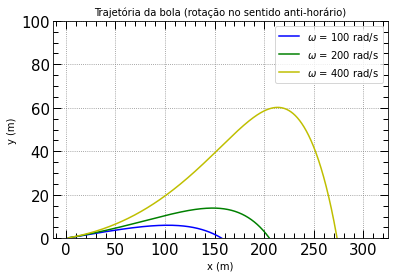

In [5]:
tempos = np.linspace(t1, t2, N)

xpoints_magnus2d_1 = []
ypoints_magnus2d_1 = []
xpoints_magnus2d_2 = []
ypoints_magnus2d_2 = []
xpoints_magnus2d_3 = []
ypoints_magnus2d_3 = []

# Computando os valores pelo método RK4
for t in tempos:
    r1 = RK4(r1,t,omega[0])
    r2 = RK4(r2,t,omega[1])
    r3 = RK4(r3,t,omega[2])

    xpoints_magnus2d_1.append(r1[0])
    ypoints_magnus2d_1.append(r1[2])
    xpoints_magnus2d_2.append(r2[0])
    ypoints_magnus2d_2.append(r2[2])
    xpoints_magnus2d_3.append(r3[0])
    ypoints_magnus2d_3.append(r3[2])

# Plotando os gráficos das trajetórias
opt_plot()
plt.title("Trajetória da bola (rotação no sentido anti-horário)", fontsize = 10)
plt.plot(xpoints_magnus2d_1, ypoints_magnus2d_1, 'b', label = "$\\omega$ = 100 rad/s")
plt.plot(xpoints_magnus2d_2, ypoints_magnus2d_2, 'g', label = "$\\omega$ = 200 rad/s")
plt.plot(xpoints_magnus2d_3, ypoints_magnus2d_3, 'y', label = "$\\omega$ = 400 rad/s")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.ylim(0, 100)
plt.show()

Perceba que quanto mais rotação a bola tem, mais ela tende a se mover para cima devido a força de Magnus que surge apontando para $+y$ devido ao sentido da rotação ser anti-horário. Naturalmente, poderíamos pensar: e se fizessemos a mesma simulação, mas agora com o sentido do giro ao contrário? O que mudaria nestes gráficos?

Façamos isso agora.

Olhando simplesmente para as equações do movimento, vemos que elas permanecem as mesmas. Não há motivo para mudarem. Exceto por uma pequena mudança de sinal, é claro. Isto é, ficamos com:

$$
\frac{dv_y}{dt} = -g - \frac{B_2}{m}vv_y - \frac{S_0}{m} v\omega,
$$

na última equação do movimento.

Colocando em código, teremos a mesma coisa de antes, exceto que implementaremos a pequena mudança de sinal.

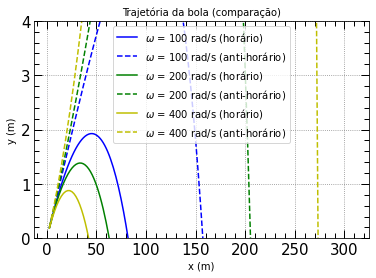

In [6]:
# Definindo novos r para guardar as novas informações
r4 = np.array([x, vx0, y, vy0],float)
r5 = np.array([x, vx0, y, vy0],float)
r6 = np.array([x, vx0, y, vy0],float)

# Redefinindo a função f
def f(r,t,omega):
    x, vx, y, vy = r[0],r[1],r[2],r[3]
    v = np.sqrt(vx*vx + vy*vy)

    fx = vx
    fvx = -b2_m*v*vx
    fy = vy
    fvy = -sconst.g - b2_m*v*vy - s0_m*v*omega

    return np.array([fx, fvx, fy, fvy], float)

# Definindo novos pontos
xpoints_magnus2d_4 = []
ypoints_magnus2d_4 = []
xpoints_magnus2d_5 = []
ypoints_magnus2d_5 = []
xpoints_magnus2d_6 = []
ypoints_magnus2d_6 = []

# Computando os valores pelo método RK4
for t in tempos:
    r4 = RK4(r4,t,omega[0])
    r5 = RK4(r5,t,omega[1])
    r6 = RK4(r6,t,omega[2])

    xpoints_magnus2d_4.append(r4[0])
    ypoints_magnus2d_4.append(r4[2])
    xpoints_magnus2d_5.append(r5[0])
    ypoints_magnus2d_5.append(r5[2])
    xpoints_magnus2d_6.append(r6[0])
    ypoints_magnus2d_6.append(r6[2])

# Plotando os gráficos das trajetórias
opt_plot()
plt.title("Trajetória da bola (comparação)", fontsize = 10)

plt.plot(xpoints_magnus2d_4, ypoints_magnus2d_4,  'b', label = "$\\omega$ = 100 rad/s (horário)")
plt.plot(xpoints_magnus2d_1, ypoints_magnus2d_1, 'b--', label = "$\\omega$ = 100 rad/s (anti-horário)")
plt.plot(xpoints_magnus2d_5, ypoints_magnus2d_5, 'g', label = "$\\omega$ = 200 rad/s (horário)")
plt.plot(xpoints_magnus2d_2, ypoints_magnus2d_2, 'g--', label = "$\\omega$ = 200 rad/s (anti-horário)")
plt.plot(xpoints_magnus2d_6, ypoints_magnus2d_6, 'y', label = "$\\omega$ = 400 rad/s (horário)")
plt.plot(xpoints_magnus2d_3, ypoints_magnus2d_3, 'y--', label = "$\\omega$ = 400 rad/s (anti-horário)")
plt.xlabel("x (m)")
plt.ylabel("y (m)")
plt.legend()
plt.ylim(0, 4)
plt.show()

Em comparação com o gráfico anterior, neste obtivemos o efeito contrário! Isto é, o alcance vertical foi reduzido drásticamente devido ao sentido de rotação ser oposto ao que era anteriormente.

Isto se deve puramente ao fato de que a força de Magnus surgirá no sentido de $-y$ para este caso.

## 3. Simulando o efeito Magnus na trajetória dos corpos em 3D

Para três dimensões, consideremos um caso diferente: uma rotação ao longo do eixo $y$, com uma força de Magnus gerada no eixo $z$, por conseguinte. Teremos as seguintes equações do movimento:

$$
\frac{dx}{dt} = v_x,
$$
$$
\frac{dv_x}{dt} = -\frac{B_2}{m}vv_x,
$$
$$
\frac{dy}{dt} = v_y,
$$
$$
\frac{dv_y}{dt} = -g - \frac{B_2}{m}vv_y,
$$
$$
\frac{dz}{dt} = v_z,
$$
$$
\frac{dv_z}{dt} = - \frac{B_2}{m}vv_z - \frac{S_0}{m} v\omega.
$$

Como será o movimento neste caso? Bem, como há força em $z$, é natural que agora utilizemos 3 dimensões para plotarmos nossos dados. Antes disso, definiremos prontamente nossos parâmetros inicias, que são parecidos aos do caso 2D, mas agora trazidos ao 3D. Os valores de $S_0$ e $B_2$ permanecem os mesmos, já que o objeto é o mesmo.

|      | Valores iniciais |
|:-----:|:-------:|
|   $v_{0x}$   | 130 m/s |
| $v_{0y}$ |   10 m/s  |
| $v_{0z}$ |   0 m/s  |
|   $x$   |    0    |
|   $y$   |    0    |
|   $z$   |    0    |
|   $\omega$   |    100 rad/s,  200 rad/s   |

Agora, vamos ao código. Definiremos as coisas de maneira muito análoga ao que já viemos fazendo. Só o plot que será diferente, pois devemos considerar, neste caso, uma dimensão a mais.

Aqui, definimos a passagem de tempo de $t = 0$ até $t = 1.55s$, com 5000 pontos avaliados novamente.

In [7]:

# Definindo os parâmetros para z
z = 0
vz_0 = 0

# Definindo novos r para guardar as novas informações e novos parâmetros de tempo
t1, t2 = 0, 1.55
N = 5000
h = (t2-t1)/N
tempos = np.linspace(t1, t2, N)

r1_3d = np.array([x, vx0, y, vy0, z, vz_0],float)
r2_3d = np.array([x, vx0, y, vy0, z, vz_0],float)

# Redefinindo a função f para o caso 3d
def f(r,t,omega):
    x, vx, y, vy, z, vz = r[0],r[1],r[2],r[3],r[4],r[5]
    v = np.sqrt(vx*vx + vy*vy + vz*vz)

    fx = vx
    fvx = -b2_m*v*vx
    fy = vy
    fvy = -sconst.g - b2_m*v*vy
    fz = vz
    fvz = - b2_m*v*vy - s0_m*v*omega

    return np.array([fx, fvx, fy, fvy, fz, fvz], float)

# Definindo novos pontos
xpoints_magnus3d_1 = np.array([])
ypoints_magnus3d_1 = np.array([])
zpoints_magnus3d_1 = np.array([])
xpoints_magnus3d_2 = np.array([])
ypoints_magnus3d_2 = np.array([])
zpoints_magnus3d_2 = np.array([])

# Computando os valores pelo método RK4
for t in tempos:
    r1_3d = RK4(r1_3d,t,omega[0])
    r2_3d = RK4(r2_3d,t,omega[1])

    xpoints_magnus3d_1 = np.append(xpoints_magnus3d_1, r1_3d[0])
    ypoints_magnus3d_1 = np.append(ypoints_magnus3d_1, r1_3d[2])
    zpoints_magnus3d_1 = np.append(zpoints_magnus3d_1, r1_3d[4])

    xpoints_magnus3d_2 = np.append(xpoints_magnus3d_2, r2_3d[0])
    ypoints_magnus3d_2 = np.append(ypoints_magnus3d_2, r2_3d[2])
    zpoints_magnus3d_2 = np.append(zpoints_magnus3d_2, r2_3d[4])

Se plotarmos uma visualização frontal ao eixo $x$ (isto é, no plano $ZY$), veremos o seguinte gráfico:

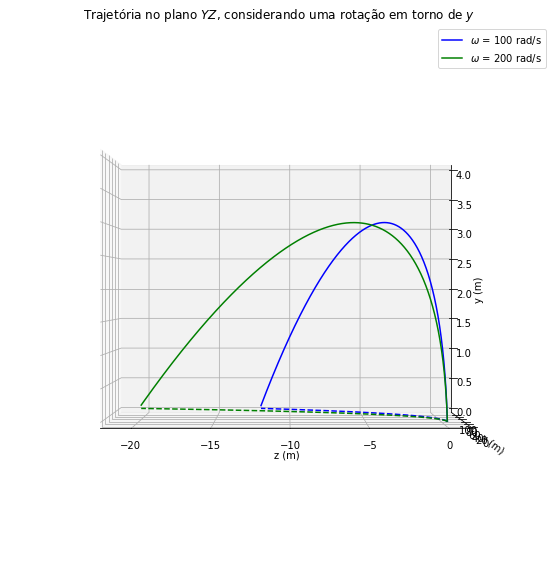

In [8]:
fig = plt.figure(figsize=(10, 10))          # No parâmetro figsize definimos o tamanho da figura
ax = fig.add_subplot(111, projection='3d')  # É importante que coloquemos o projection = '3d' para indicar que nosso gráfico será em 3 dimensões

# Plotando os gráficos das trajetórias
ax.plot3D(zpoints_magnus3d_1, xpoints_magnus3d_1, ypoints_magnus3d_1, color="blue", label = '$\\omega$ = 100 rad/s')
ax.plot3D(zpoints_magnus3d_2, xpoints_magnus3d_2, ypoints_magnus3d_2, color="green", label = '$\\omega$ = 200 rad/s')

# Plotando linhas auxiliárias para nos ajudar a enxergar melhor o gráfico
ax.plot3D(zpoints_magnus3d_1, xpoints_magnus3d_1, 0, color="blue", linestyle="dashed")
ax.plot3D(zpoints_magnus3d_2, xpoints_magnus3d_2, 0, color="green", linestyle="dashed")

# Definindo os parâmetros do gráfico
ax.view_init(elev=0., azim=270)
ax.set_zlim([0,4])
ax.legend()
ax.set_xlabel('z (m)')
ax.set_ylabel('x (m)')
ax.set_zlabel('y (m)')
ax.set_title("Trajetória no plano $YZ$, considerando uma rotação em torno de $y$")
plt.show()

Ainda, se plotarmos uma visualização do plano $XZ$, ou seja, o equivalente a uma vista superior, veremos o seguinte gráfico:

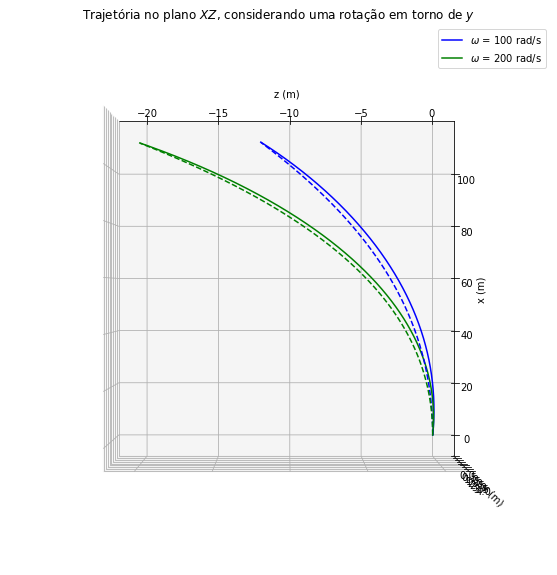

In [9]:
fig = plt.figure(figsize=(10, 10))          # No parâmetro figsize definimos o tamanho da figura
ax = fig.add_subplot(111, projection='3d')  # É importante que coloquemos o projection = '3d' para indicar que nosso gráfico será em 3 dimensões

# Plotando os gráficos das trajetórias
ax.plot3D(zpoints_magnus3d_1, xpoints_magnus3d_1, ypoints_magnus3d_1, color="blue", label = '$\\omega$ = 100 rad/s')
ax.plot3D(zpoints_magnus3d_2, xpoints_magnus3d_2, ypoints_magnus3d_2, color="green", label = '$\\omega$ = 200 rad/s')

# Plotando linhas auxiliárias para nos ajudar a enxergar melhor o gráfico
ax.plot3D(zpoints_magnus3d_1, xpoints_magnus3d_1, 0, color="blue", linestyle="dashed")
ax.plot3D(zpoints_magnus3d_2, xpoints_magnus3d_2, 0, color="green", linestyle="dashed")

# Definindo os parâmetros do gráfico
ax.view_init(elev=90., azim=270)
ax.set_zlim([0,4])
ax.legend()
ax.set_xlabel('z (m)')
ax.set_ylabel('x (m)')
ax.set_zlabel('y (m)')
ax.set_title("Trajetória no plano $XZ$, considerando uma rotação em torno de $y$")
plt.show()

Ou seja, é possível perceber que a trajetória foi defletida em relação ao eixo $z$. No final das contas, não colocamos nenhuma velocidade inicial em $z$, mas a trajetória será defletida nesta direção mesmo assim devido ao efeito Magnus!

E agora, vamos ao último plot, onde combinamos as vistas para formar este belo gráfico:

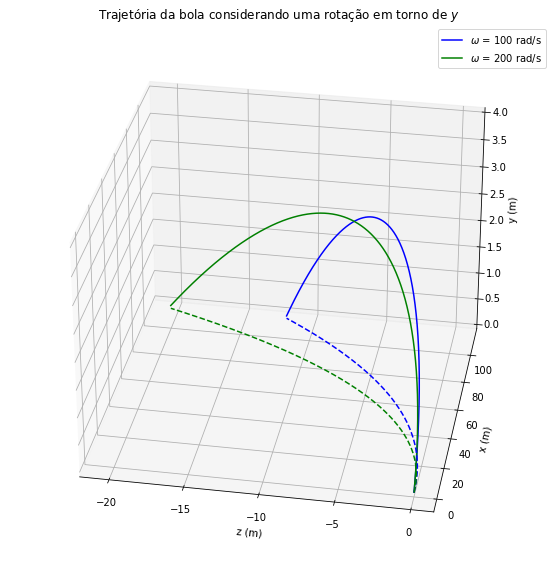

In [10]:
fig = plt.figure(figsize=(10, 10))          # No parâmetro figsize definimos o tamanho da figura
ax = fig.add_subplot(111, projection='3d')  # É importante que coloquemos o projection = '3d' para indicar que nosso gráfico será em 3 dimensões

# Plotando os gráficos das trajetórias
ax.plot3D(zpoints_magnus3d_1, xpoints_magnus3d_1, ypoints_magnus3d_1, color="blue", label = '$\\omega$ = 100 rad/s')
ax.plot3D(zpoints_magnus3d_2, xpoints_magnus3d_2, ypoints_magnus3d_2, color="green", label = '$\\omega$ = 200 rad/s')

# Plotando linhas auxiliárias para nos ajudar a enxergar melhor o gráfico
ax.plot3D(zpoints_magnus3d_1, xpoints_magnus3d_1, 0, color="blue", linestyle="dashed")
ax.plot3D(zpoints_magnus3d_2, xpoints_magnus3d_2, 0, color="green", linestyle="dashed")

# Definindo os parâmetros do gráfico
ax.view_init(elev=30., azim=280)
ax.set_zlim([0,4])
ax.legend()
ax.set_xlabel('z (m)')
ax.set_ylabel('x (m)')
ax.set_zlabel('y (m)')
ax.set_title("Trajetória da bola considerando uma rotação em torno de $y$")
plt.show()

### Conclusão

Claro, é por aqui que finalizo este `Notebook`. Na referência [3], o leitor encontrará uma descrição muito semelhante a tratada aqui, mas com mais ênfase na descrição física de uma bola de baseball. Vale a pena a consulta, caso o leitor queira se aprofundar no tópico.

Assim como a referência [2], bastante utilizada nestes últimos projetos, também vale muito a pena ser consultada.

Por fim, finalizo com este GIF que mostra o efeito Magnus no mundo real!

![](../Imagens/gifmagnuseffect.gif)

## Referências

**[1]** [Lançamento de Projéteis: uma introdução](https://github.com/moseseusueus/PET.py/blob/main/Notebooks/Lan%C3%A7amento%20de%20proj%C3%A9teis%2C%20uma%20introdu%C3%A7%C3%A3o.ipynb)

**[2]** *Giordano, N. J., & Nakanishi, H. (2006). Computational physics.*

**[3]** R. K. Adair, *The Physics of Baseball*, Physics Today, May 1995, p.26.